In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
FILE_PATH = '/content/drive/MyDrive/data/PlantVillage'

In [7]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/data/PlantVillage', output="/content/drive/MyDrive/data/PlantVilage_final", seed=None , ratio=(.8, .1, .1))

Copying files: 2152 files [00:56, 38.17 files/s]


In [11]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/data/PlantVilage_final/train',
                                  target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                  batch_size=BATCH_SIZE,
                                  class_mode='sparse',)
                                  #save_to_dir='/content/drive/MyDrive/data/AugmentedImages')

Found 1721 images belonging to 3 classes.


In [12]:
for image_batch, label_batch in train_generator:
  print(image_batch[0])
  break

[[[0.73298293 0.72906137 0.7839634 ]
  [0.7263592  0.7224376  0.7773396 ]
  [0.75460976 0.7506882  0.80559015]
  ...
  [0.6713584  0.66743684 0.73018193]
  [0.6721878  0.66826624 0.73101133]
  [0.67301726 0.6690957  0.7318408 ]]

 [[0.735886   0.7319644  0.78686637]
  [0.7217973  0.7178757  0.77277774]
  [0.75543916 0.7515176  0.80641955]
  ...
  [0.681699   0.6777774  0.74052256]
  [0.6854314  0.68150985 0.74425495]
  [0.68916386 0.6852423  0.7479874 ]]

 [[0.73878896 0.7348674  0.78976935]
  [0.71723545 0.7133139  0.7682159 ]
  [0.7562686  0.75234705 0.807249  ]
  ...
  [0.71645415 0.7125326  0.7752777 ]
  [0.71977186 0.7158503  0.7785954 ]
  [0.7230896  0.719168   0.7819131 ]]

 ...

 [[0.4472373  0.4354726  0.50213933]
  [0.44062713 0.42886242 0.4955291 ]
  [0.44560367 0.43383896 0.5005056 ]
  ...
  [0.4833592  0.47551605 0.53041804]
  [0.43715957 0.42931643 0.4842184 ]
  [0.44920295 0.44135982 0.49626178]]

 [[0.4824455  0.4706808  0.53734744]
  [0.48885646 0.47709176 0.5437584 ]


In [13]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/data/PlantVilage_final/val',
                                  target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                  batch_size=BATCH_SIZE,
                                  class_mode='sparse',)
                                  #save_to_dir='/content/drive/MyDrive/data/AugmentedImages')

Found 215 images belonging to 3 classes.


In [14]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/data/PlantVilage_final/test',
                                  target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                  batch_size=BATCH_SIZE,
                                  class_mode='sparse',)
                                  #save_to_dir='/content/drive/MyDrive/data/AugmentedImages')


Found 216 images belonging to 3 classes.


In [17]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])



In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 64)      

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,

)

Epoch 1/20
47/47 [==============================] - 143s 3s/step - loss: 0.5819 - accuracy: 0.7615 - val_loss: 0.2841 - val_accuracy: 0.8958
Epoch 2/20
47/47 [==============================] - 140s 3s/step - loss: 0.3847 - accuracy: 0.8490 - val_loss: 0.1490 - val_accuracy: 0.9375
Epoch 3/20
47/47 [==============================] - 143s 3s/step - loss: 0.1704 - accuracy: 0.9339 - val_loss: 0.1135 - val_accuracy: 0.9635
Epoch 4/20
47/47 [==============================] - 145s 3s/step - loss: 0.1135 - accuracy: 0.9579 - val_loss: 0.2653 - val_accuracy: 0.8854
Epoch 5/20
47/47 [==============================] - 143s 3s/step - loss: 0.0977 - accuracy: 0.9661 - val_loss: 0.1006 - val_accuracy: 0.9688
Epoch 6/20
47/47 [==============================] - 141s 3s/step - loss: 0.1403 - accuracy: 0.9512 - val_loss: 0.1396 - val_accuracy: 0.9531
Epoch 7/20
47/47 [==============================] - 148s 3s/step - loss: 0.0785 - accuracy: 0.9774 - val_loss: 0.0872 - val_accuracy: 0.9688
Epoch 8/20
47

In [23]:
scores = model.evaluate(test_generator)
scores

7/7 [==============================] - 7s 927ms/step - loss: 0.0381 - accuracy: 0.9861


[0.03806183487176895, 0.9861111044883728]

Plotting the Accuracy and Loss Curves

In [24]:
print(history)
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 20, 'steps': 47}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [25]:
type(history.history['loss'])

list

In [26]:
len(history.history['loss'])

20

In [27]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.5819295644760132,
 0.3847005069255829,
 0.1703615039587021,
 0.11349692195653915,
 0.09765608608722687]

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [29]:
val_acc

[0.8958333134651184,
 0.9375,
 0.9635416865348816,
 0.8854166865348816,
 0.96875,
 0.953125,
 0.96875,
 0.9583333134651184,
 0.9114583134651184,
 0.9635416865348816,
 0.9739583134651184,
 0.9583333134651184,
 0.953125,
 0.9114583134651184,
 0.9895833134651184,
 0.984375,
 0.9635416865348816,
 0.984375,
 0.9895833134651184,
 0.9947916865348816]

In [30]:
acc

[0.7615230679512024,
 0.849031388759613,
 0.9338677525520325,
 0.9579158425331116,
 0.9660904407501221,
 0.951235830783844,
 0.977393627166748,
 0.9672678709030151,
 0.907579779624939,
 0.9579158425331116,
 0.9813829660415649,
 0.9706078767776489,
 0.9792919158935547,
 0.9699398875236511,
 0.9759519100189209,
 0.9879759550094604,
 0.9846359491348267,
 0.9812959432601929,
 0.9832999110221863,
 0.9866399168968201]

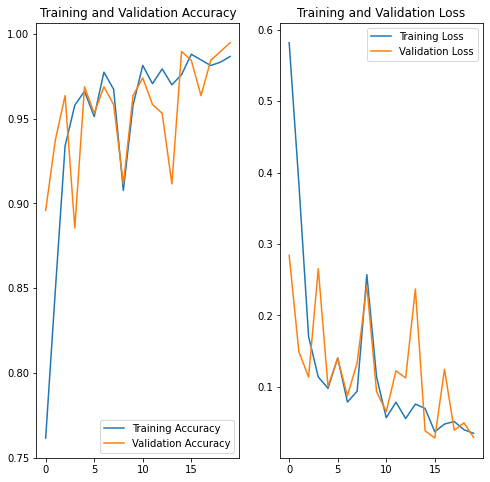

In [31]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


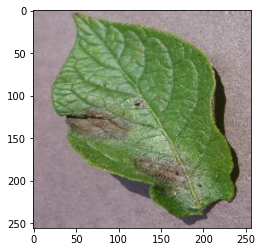

In [34]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

Inference

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

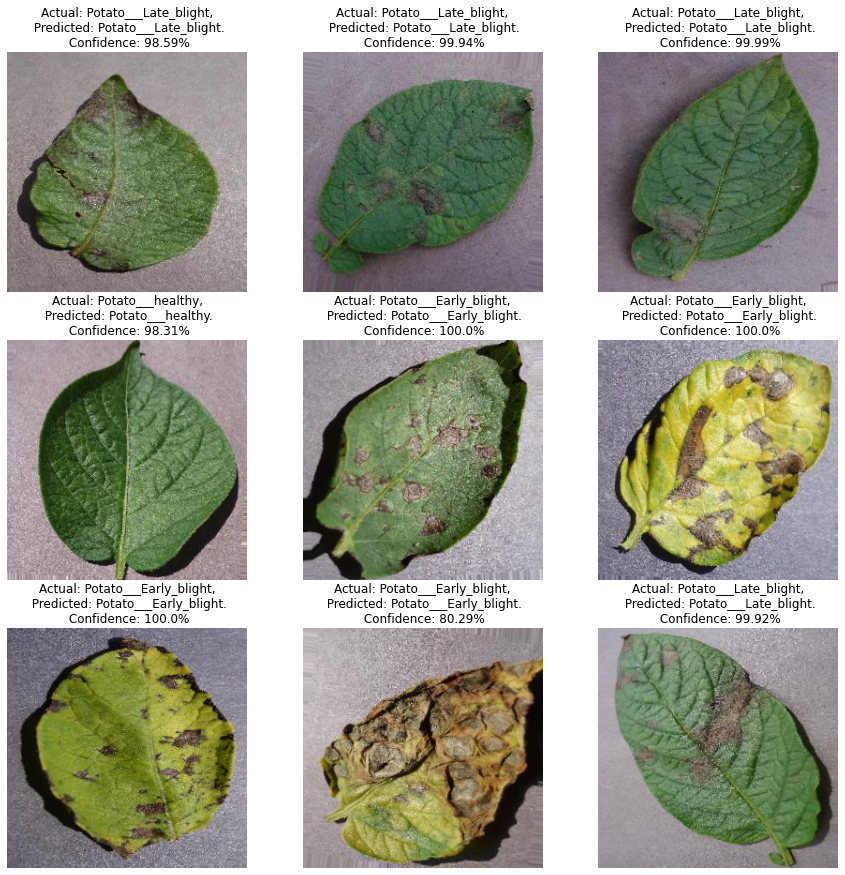

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [37]:
model.save("/content/drive/MyDrive/data/model_image_gen.h5")